# Prepare for persistent storage of results

In [1]:
import os
import shutil

varinfo = {"root_uri": "/tmp/myresults"}

def prepare_results(clean=True):
    if clean:
        shutil.rmtree(varinfo["root_uri"], ignore_errors=True)
    os.makedirs(varinfo["root_uri"], exist_ok=True)

# Load a cyclic graph

{'directed': True,
 'graph': {'name': 'taskgraphlib.taskgraphs.cyclic_graph2'},
 'links': [{'arguments': {'a': 'result'},
            'conditions': {'too_small': True},
            'source': 'task1',
            'target': 'task2'},
           {'arguments': {'a': 'result'},
            'conditions': {'too_small': True},
            'source': 'task2',
            'target': 'task3'},
           {'arguments': {'a': 'result'},
            'conditions': {'too_small': True},
            'source': 'task3',
            'target': 'task1'}],
 'nodes': [{'class': 'tasklib.tasks.CondSumTask',
            'id': 'task1',
            'inputs': {'a': 1}},
           {'class': 'tasklib.tasks.CondSumTask',
            'id': 'task2',
            'inputs': {'b': 1}},
           {'class': 'tasklib.tasks.CondSumTask',
            'id': 'task3',
            'inputs': {'b': 1}}]}


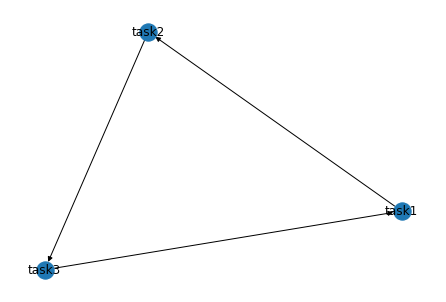

In [2]:
from pprint import pprint
import networkx
import matplotlib.pyplot as plt
from esrftaskgraph import load_graph
from taskgraphlib import cyclic_graph2

varinfo = {"root_uri": "/tmp/myresults"}

persistent_taskgraph, expected_result = cyclic_graph2()

runtime_taskgraph = load_graph(persistent_taskgraph)

pprint(persistent_taskgraph)

networkx.draw(runtime_taskgraph.graph, with_labels=True)
plt.show()

# Schedulers for cyclic graphs

In [3]:
schedulers = {}

In [4]:
def pypushflow_scheduler(taskgraph, varinfo):
    # tasks are distributed over processes
    import esrf2pypushflow

    return esrf2pypushflow.job(taskgraph, varinfo=varinfo)
    
schedulers["pypushflow"] = pypushflow_scheduler

# Execute and verify result

In [5]:
scheduler = schedulers["pypushflow"]

# Prepare location for results
varinfo["root_uri"] = "/tmp/myresults"
prepare_results(clean=True)

result = scheduler(persistent_taskgraph, varinfo)

DEBUG:pypushflow:
DEBUG:pypushflow:
DEBUG:pypushflow:Starting new workflow taskgraphlib.taskgraphs.cyclic_graph2
DEBUG:pypushflow:
DEBUG:pypushflow:Adding actor ref: Start
DEBUG:pypushflow:Adding actor ref: Join before stop
DEBUG:pypushflow:Connecting actor "Join before stop" to actor "Stop"
INFO:esrf2pypushflow.bindings:Connect: 'Join before stop' -> 'Stop'
DEBUG:pypushflow:Adding actor ref: Stop on error
DEBUG:pypushflow:Connecting actor "Stop on error" to actor "Stop"
INFO:esrf2pypushflow.bindings:Connect: 'Stop on error' -> 'Stop'
DEBUG:pypushflow:Adding actor ref: task1
INFO:esrf2pypushflow.bindings:Connect (on error): 'task1' -> 'Stop on error'
DEBUG:pypushflow:Adding actor ref: task1
DEBUG:pypushflow:Adding actor ref: task2
INFO:esrf2pypushflow.bindings:Connect (on error): 'task2' -> 'Stop on error'
DEBUG:pypushflow:Adding actor ref: task2
DEBUG:pypushflow:Adding actor ref: task3
INFO:esrf2pypushflow.bindings:Connect (on error): 'task3' -> 'Stop on error'
DEBUG:pypushflow:Adding

Error when trying to import pymongo and/or bson - no MongoDB connection possible


DEBUG:pypushflow:Before apply_async, func=<bound method ActorWrapper.run of <pypushflow.PythonActor.ActorWrapper object at 0x7feb533f5ee0>>, callback=<bound method PythonActor.triggerDownStreamActor of <esrf2pypushflow.bindings.EsrfPythonActor object at 0x7feb533f59a0>>, errorCallback=<bound method PythonActor.errorHandler of <esrf2pypushflow.bindings.EsrfPythonActor object at 0x7feb533f59a0>>
DEBUG:pypushflow:args=({'_noninput': {'varinfo': {'root_uri': '/tmp/myresults'}, 'node_name': 'task1', 'node_attrs': {'inputs': {'a': 1}, 'class': 'tasklib.tasks.CondSumTask'}}},), kwargs={}
DEBUG:pypushflow:After apply_async
DEBUG:pypushflow:In Stop, parent taskgraphlib.taskgraphs.cyclic_graph2, before lock.acquire
DEBUG:pypushflow:In actor wrapper for task1
DEBUG:pypushflow:args=({'_noninput': {'varinfo': {'root_uri': '/tmp/myresults'}, 'node_name': 'task1', 'node_attrs': {'inputs': {'a': 1}, 'class': 'tasklib.tasks.CondSumTask'}}},), kwargs={}, method=<function run at 0x7feb533ecee0>
DEBUG:pyp

In [6]:
from esrftaskgraph import Variable

for k, v in expected_result.items():
    uhash = result[k]
    var = Variable(uhash=uhash, varinfo=varinfo)
    assert var.value == v